# pake keras

In [17]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#load data
X_train = np.genfromtxt('./visitor_data/X_train',delimiter=',')
y_train = np.genfromtxt('./visitor_data/y_train',delimiter=',')
X_test = np.genfromtxt('./visitor_data/X_test',delimiter=',')
y_test = np.genfromtxt('./visitor_data/y_test',delimiter=',')

In [19]:
X_train.shape

(34, 14)

In [20]:
X_train = X_train.reshape(34,14,1)
X_test = X_test.reshape(34,14,1)

In [21]:
LATENT_DIM = 14 # mau ambil 14 hari pertama untuk predict hari ke 15
BATCH_SIZE = 1 # karena 1 row, 1 jenis arena
EPOCHS = 2000
HORIZON = 1 # prediksi 1 langkah ke depan

# membuat model

In [22]:
model = Sequential()
model.add(GRU(LATENT_DIM,input_shape=(14,1)))
model.add(Dense(HORIZON))

In [23]:
model.compile(optimizer='Adam',loss='mse')

In [24]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 14)                672       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 15        
Total params: 687
Trainable params: 687
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test),
                    callbacks=[earlystop],
                    verbose=0)

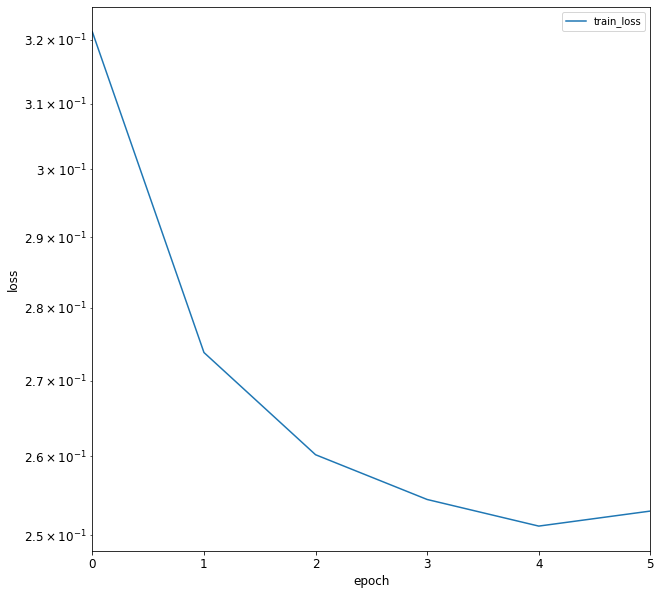

In [27]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [36]:
predictions = model.predict(X_train)

In [37]:
predictions=predictions.flatten()
predictions.shape

(34,)

In [38]:
predictions

array([-0.44220456, -0.3990228 , -0.10437266, -0.39185318, -0.273589  ,
       -0.21104413, -0.3499154 , -0.4634683 , -0.4780547 , -0.42835742,
       -0.29786724, -0.3880988 , -0.40214738, -0.3939127 , -0.5279912 ,
       -0.3081693 , -0.45381913, -0.4418732 , -0.41186553, -0.5100429 ,
       -0.46492085, -0.29417887, -0.5168228 , -0.48582944, -0.04356391,
       -0.43215245, -0.45104223, -0.52125365, -0.47703454, -0.51074934,
       -0.4936784 , -0.46261683, -0.4603576 ,  0.15201074], dtype=float32)

In [39]:
y_train

array([-0.62792461, -0.41236753, -0.62792461, -0.48421989,  0.66541788,
       -0.55607225, -0.62792461, -0.48421989, -0.55607225, -0.62792461,
       -0.48421989, -0.34051517, -0.62792461, -0.41236753, -0.62792461,
       -0.48421989, -0.19681045, -0.41236753,  1.886908  , -0.62792461,
       -0.62792461, -0.62792461, -0.62792461, -0.62792461, -0.55607225,
       -0.34051517, -0.62792461, -0.55607225, -0.48421989, -0.41236753,
       -0.62792461, -0.62792461, -0.34051517,  1.02467968])

In [40]:
#10 trend prediksi
np.argsort(predictions)

array([14, 27, 22, 29, 19, 30, 23,  8, 28, 20,  7, 31, 32, 16, 26,  0, 17,
       25,  9, 18, 12,  1, 13,  3, 11,  6, 15, 10, 21,  4,  5,  2, 24, 33])

In [41]:
#10 trend actual
np.argsort(y_train)

array([ 0, 26, 23, 22, 21, 20, 19, 30, 12, 14,  6,  2, 31,  9, 27,  8, 24,
        5,  3, 10, 15, 28,  7, 17, 13,  1, 29, 32, 25, 11, 16,  4, 33, 18])